In [1]:
#Performing standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#correcting spelling of gender columns
dataset.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']


In [9]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
X = dataset[['Annual Income (k$)','Spending Score (1-100)']].values

In [20]:
from sklearn.cluster import KMeans

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    c_kmeans = wcss.append(kmeans.inertia_)
    
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

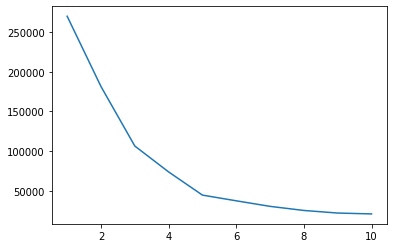

In [28]:
sns.lineplot(range(1,11),wcss,markers='x')

In [29]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [44]:
y_means = kmeans.fit_predict(X)

In [45]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [120]:
X[y_means == 4,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

Text(0.5, 1.0, 'K-Means Clustering')

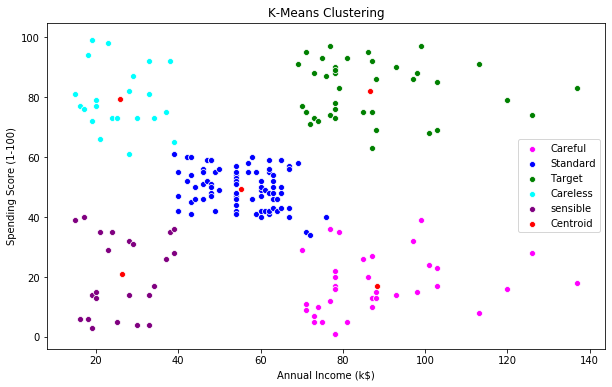

In [113]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[y_means==0,0],X[y_means==0,1],color='magenta',label='Careful')
sns.scatterplot(X[y_means==1,0],X[y_means==1,1],color='blue',label='Standard')
sns.scatterplot(X[y_means==2,0],X[y_means==2,1],color='green',label='Target')
sns.scatterplot(X[y_means==3,0],X[y_means==3,1],color='cyan',label='Careless')
sns.scatterplot(X[y_means==4,0],X[y_means==4,1],color='purple',label='sensible')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',label='Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')